# Busqueda por Profundidad

A continuacion se ejemplifica la busqueda por profundidad revisada en clase. Para ello se tiene un ejemplo de la solucion de un Puzzle utilizando recursividad


In [1]:
# Busqueda en Profundidad

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node): # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)

In [2]:
# Implementacion del metodo de busqueda por profundidad
def search_profundidad(init_node, solution, visited):
    visited.append(init_node.data) #Lista de visitados
    if init_node.data == solution: # Condicion de salida recursividad (Encontro la solucion)
        return init_node # Retorno el nodo resultado
    else:
        # Expandir nodos sucesores (hijos)
        node_data = init_node.data
        son = [node_data[1], node_data[0], node_data[2], node_data[3]]
        izq = Node(son)
        son = [node_data[0], node_data[2], node_data[1], node_data[3]]
        centro = Node(son)
        son = [node_data[0], node_data[1], node_data[3], node_data[2]]
        der = Node(son)
        init_node.set_child([izq, centro, der])

        for node_son in init_node.child: # Recorrer los nodos hijos
            if not node_son.data in visited: # No deben estar en los nodos visitados
                # Llamada Recursiva
                Solution = search_profundidad(node_son, solution, visited) 
                if Solution is not None: # Cuando encuentra una solucion
                    return Solution # Retornamos la solucion encontrada
        return None

init_state = [4, 2, 3, 1] # Creamos un estado inicial
solution = [1, 2, 3, 4] # La solucion que debe buscar
#Inicializamos las variables
solution_node = None 
visited = []
init_node = Node(init_state)
node = search_profundidad(init_node, solution, visited) # Llamamos la metodo de busqueda

# Mostrar Resultado
result = []
while node.fathr is not None:
    result.append(node.data)
    node = node.fathr
result.append(init_state)
result.reverse() # Reverso el resultado (Solo para presentar)
print(result)

[[4, 2, 3, 1], [2, 4, 3, 1], [2, 3, 4, 1], [3, 2, 4, 1], [3, 4, 2, 1], [4, 3, 2, 1], [4, 3, 1, 2], [3, 4, 1, 2], [3, 1, 4, 2], [1, 3, 4, 2], [1, 4, 3, 2], [4, 1, 3, 2], [4, 1, 2, 3], [1, 4, 2, 3], [1, 2, 4, 3], [2, 1, 4, 3], [2, 1, 3, 4], [1, 2, 3, 4]]


## Practica

Implementar un algoritmo que me permita dibujar la busqueda de soluciones.

Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Centros educativos, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas.

Realizar un metodo de busqueda para encontrar la solucion de colocar en un tablero las 4 reinas.


Subir el cuaderno con la resolucion.


In [14]:
# Implementar

[[4, 2, 3, 1], [2, 4, 3, 1], [2, 3, 4, 1], [2, 3, 1, 4], [2, 1, 3, 4], [1, 2, 3, 4]]


# Centros Educativos

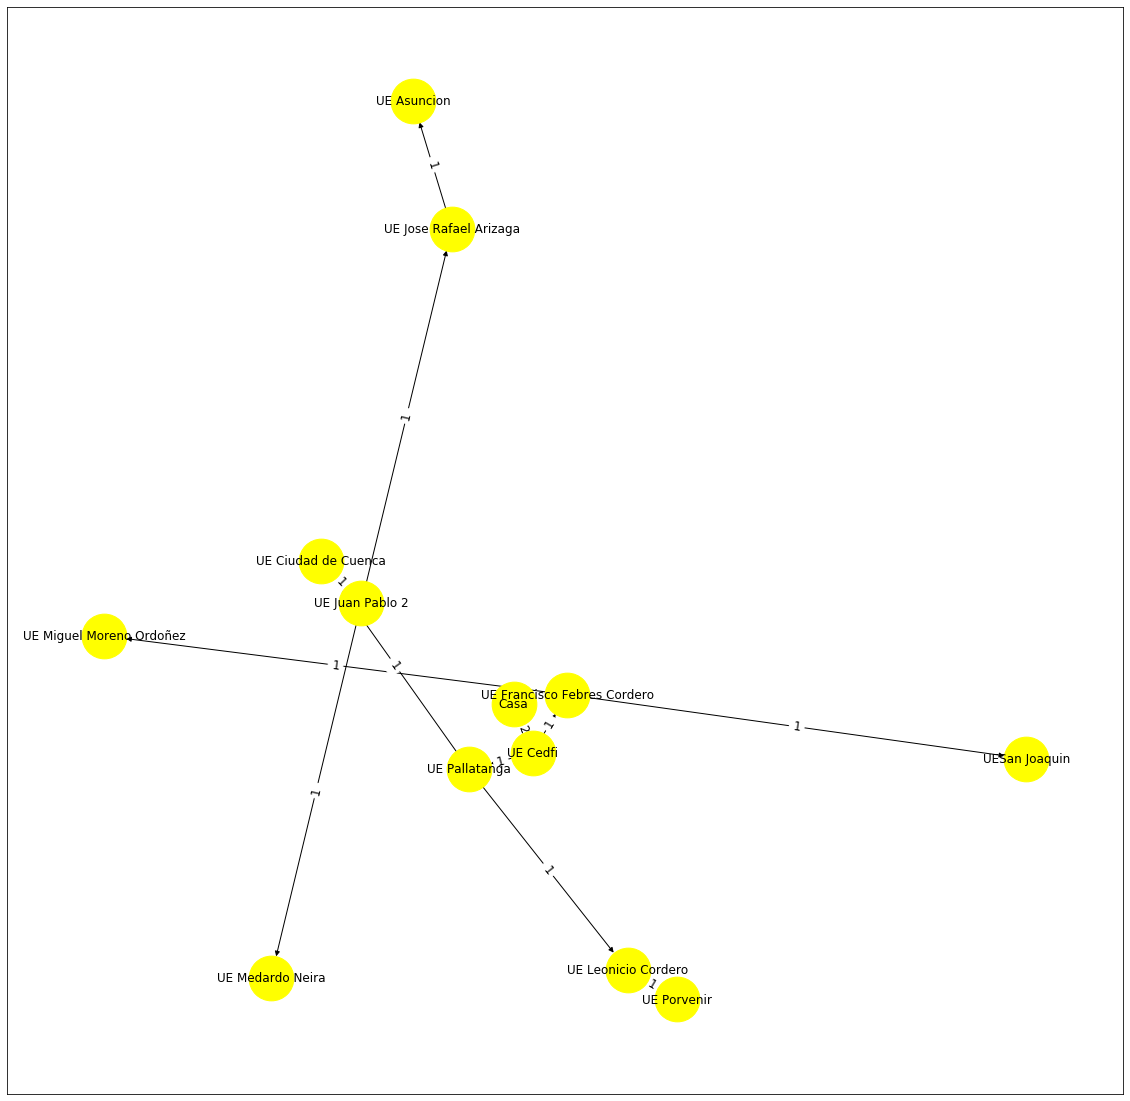

In [38]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

educativos = {
        'Casa': {'UE Cedfi':2},
        'UE Cedfi': {'UE Pallatanga':1, 'UE Francisco Febres Cordero':1},
        'UE Pallatanga': {'UE Leonicio Cordero':1, 'UE Ciudad de Cuenca':1},
        'UE Leonicio Cordero':{'UE Porvenir':1},
        'UE Francisco Febres Cordero':{'UESan Joaquin':1, 'UE Miguel Moreno Ordoñez':1},
        'UE Ciudad de Cuenca':{'UE Juan Pablo 2':1},
        'UE Juan Pablo 2':{'UE Jose Rafael Arizaga':1,'UE Medardo Neira':1},
        'UE Jose Rafael Arizaga':{'UE Asuncion':1}
}

def graficar(datos):
    graf = nx.DiGraph()
    graf.add_nodes_from(datos)
    for valor, listaValor in datos.items():
        for a in listaValor:
            graf.add_edge(valor,a,size=25,length=str(listaValor[a]))
    
    pos = nx.spring_layout(graf)
    plt.figure(figsize=(20,20)) 
    labels = nx.get_edge_attributes(graf,'length')
    nx.draw_networkx(graf, pos, node_color = 'yellow', with_labels = True, node_size=2000)
    nx.draw_networkx_edge_labels(graf,pos,edge_labels=labels,font_color='black',font_size=12)
    plt.show()

graficar(educativos)

# 4 Reinas

In [4]:
sol=[0,0,0,0]
fila=0
def Reinas(sol,fila,n):
    if fila>=n:
        return False
    enc = False
    while True:
            if (sol[fila] < n):
                sol[fila] = sol[fila] + 1
            if (Validar(sol,fila)):
                if fila != n-1:
                    enc = CuatroReinas(sol, fila+1,n)
                    if enc==False:
                        sol[fila+1] = 0
                else:
                    print(sol)
                    enc = True
            if (sol[fila]==n or enc==True):
                break
    return enc
def Validar(sol,fila):
    for i in range(fila):
        if (sol[i]==sol[fila]) or (abs(fila-i)== abs(sol[fila]-sol[i])):
            return False
    return True
print(Reinas(sol,fila,4))

[2, 4, 1, 3]
True


# Conclusiones

In [ ]:
La busqueda por amplitud nos permite encontrar la solcuion mediante recorrer solo uno de las ramas de los hijos a la vez.